# Particle with a Finite Potential

* **Author:**

* **Date:**

* **Time spent on this assignment:**

In [21]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation
from IPython.display import HTML
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['FuncAnimation','HTML','resetMe','scipy','np','plt','math','jax','jnp','jit','grad','HTML','animation','animateMe_singlePendula']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    plt.rcParams.update({"font.size": 14})
    return
resetMe()
import datetime;datetime.datetime.now()

datetime.datetime(2025, 5, 6, 20, 14, 34, 538741)

In this assignment, we will consistently use grids and observables that we will set up in this way. This is very similar to how you set things for the particle in the box assignment.  We've also updated your animation code to include a skip parameter which will allow you to only show every skip'th frame.  This will make your animation generate much faster (if you choose a big skip).  It can't be called like

```
skip=10
animation = FuncAnimation(fig, update, frames=len(arrays)//skip, interval=10*skip, fargs=(max_value,skip),repeat=False)
```

**Note: You will modify and improve your animation funtion later in the assignment**

In [22]:
def SetupGrid(L,delta_x):
    ns=np.array(range(0,int((L+2*delta_x)//delta_x)))
    xs=ns*delta_x-L/2
    return xs

def SetupObservables(xs,delta_x):
    X=np.diag(xs)
    P=(np.diag([1.j/(2*delta_x) for i in range(len(xs)-1)],k=1)+np.diag([-1.j/(2*delta_x) for i in range(len(xs)-1)],k=-1))

    P2=np.zeros_like(P)
    for i in range(len(xs)):
        P2[i,i]=2.0/delta_x**2
        if i+1<len(xs):
            P2[i,i+1]=-1.0/delta_x**2
            P2[i+1,i]=-1.0/delta_x**2
    return X,P,P2



def update(frame, max_value,skip=1):
    plt.cla()  # Clear the current plot
    plt.plot(xs, np.abs(arrays[::skip][frame])**2)  # Plot the current array
    plt.axvline(arrays[::skip][frame]@X@arrays[::skip][frame].T.conjugate())
    plt.ylim(0, max_value)  # Set the y-axis limit
    plt.xlabel('x')
    plt.ylabel('Value')
    plt.title(f'Frame {skip*frame+1}/{len(arrays)}')  # Display the frame number

## Exercise 1. Particle in a Finite Well

In the previous assignment we worked on a particle in a box with infinite walls.  In this assignment, we are going to work instead with a potential well again looking at properties such as eigenstates and time dynamics.

### a. Setting up the Hamiltonian


Consider a particle in a box of length 40 spanning
* $-10 \leq x \leq 10$ at $V=0$
* $-20 \leq x \leq -10$ at $V=0.5$
* $10 \leq x \leq 20$ at $V=0.5$

Generate a discretize `xs` with the same $\delta x=0.01$ that you used previously - i.e. `xs=SetupGrid(L,delta_x)`
Also generate a numpy array `V` which has the correct potential at each value of $x$.  Verify this all looks correct by plotting $V$ vs. $x$.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [23]:
#Defining constants:
hbar = 1.0
m = 1.0
delta_x = 0.01
L = 40

#Generating a discrete XS
xs = SetupGrid(40,0.01)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

We know need to again set up the Hamiltonian

$$ H \equiv \left( -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}  + V \right)  $$

You already know how to turn the first term into a matrix.  Because we are working in the $x$ basis, the $V$ term is also very simple:  it is just a matrix with $V(x)$ on the diagonal.   To get the matrix for the total Hamiltonian, we just add these two matrices.

Set up this Hamiltonian, and then get the eigenvalues and eigenvectors.

Plot the first 20 eigenvalues.  You should notice that there is two qualitatively different behavior happening that switches over right when the eigenvalue energy gets greater then 0.5 (where our potential wall is.)


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

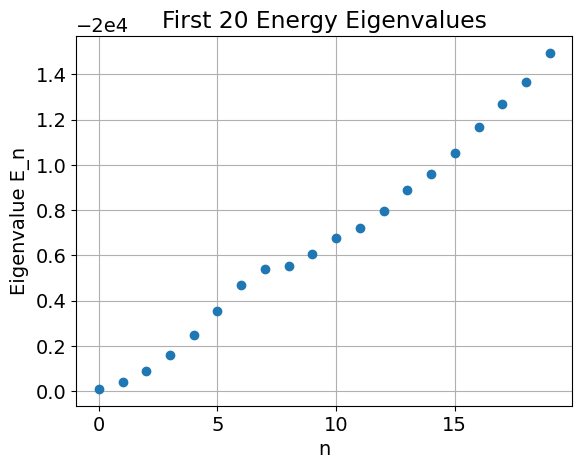

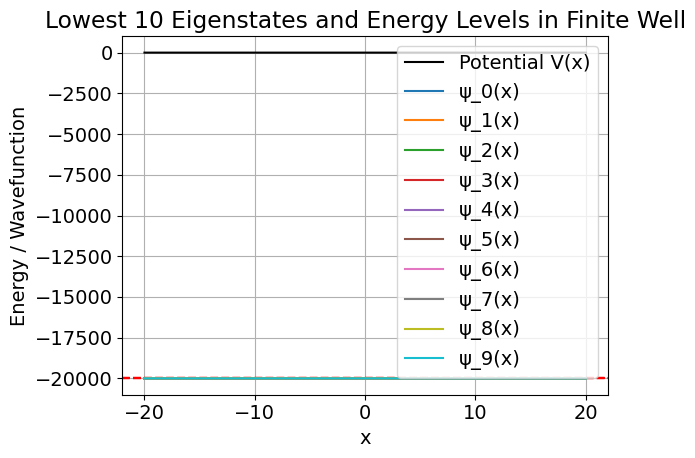

In [24]:
#Defining obserbables:
X, P, P2 = SetupObservables(xs, delta_x)
#Defining Potential
V = np.zeros_like(xs)
#Setting up the potential V(x)
V[((xs >= -20) & (xs < -10)) | ((xs > 10) & (xs <= 20))] = 0.5
V_matrix = np.diag(V)
#Hamiltonian:
H = -(hbar**2 / (2 * m)) * P2 + V_matrix
eigvals, eigvecs = np.linalg.eigh(H)

#Graphing:
plt.plot(eigvals[:20], 'o')
plt.xlabel('n')
plt.ylabel('Eigenvalue E_n')
plt.title('First 20 Energy Eigenvalues')
plt.grid(True)
plt.show()




<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Now we would like to plot the energies in a slightly different way and plot the eigenvectors on top of them.  Let's start by again plotting the potential as a function of distance.  

On top of this potential we are going to plot the lowest 10 energy levels.  Plot them with `plt.axhline(values,linestyle='--',alpha=0.5)`  You should notice that some of the energies are less then the potential and some of them more then the potential.


Now on top of this, we want to plot the lowest 10 eigenstates.   To make them easier to understand, let's shift each eigensstate vertically by adding `e[i]` to the i'th eigenstate - i.e. `plt.plot(v[:,i]+e[i])`.  Notice that if you do this, you have each eigenstate whose origin is centered on their energy.


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

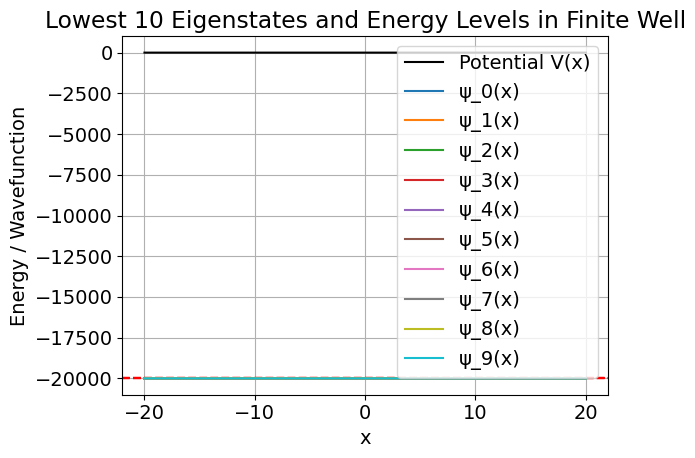

In [28]:
#Plotting the potential:
plt.plot(xs, V, label='Potential V(x)', color='black')

#Plotting the lowest 10 energy levels:
for i in range(10):
    plt.axhline(eigvals[i], linestyle='--', alpha=0.5, color='red')

#Plotting the first 10 eigenstates, vertically shifted to their corresponding energy:
for i in range(10):
    psi = eigvecs[:, i]
    #Normalizing the wavefunctions:
    psi_normalized = psi / np.sqrt(np.sum(np.abs(psi)**2) * delta_x)
    plt.plot(xs, np.real(psi_normalized) + eigvals[i], label=f'ψ_{i}(x)')

#Customizing the plot and showing it:
plt.xlabel('x')
plt.ylabel('Energy / Wavefunction')
plt.title('Lowest 10 Eigenstates and Energy Levels in Finite Well')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b.  Eigenstates in the forbidden region

We now want to look at the eigenstates in the forbidden region.  To begin with, let's just qualitatively notice the difference between the eigenstates which are lower in energy then the finite wall and the ones that are higher in energy then the finite wall.  


Q:  As the wave-function goes to $x>10$, do the eigenstates approach zero  
* for the eigenstates whose energy is greater then 0.5
* for the eigenstates whose energy is less then 0.5

When the energy is larger then the potential, notice that the larger tha value of (E-V) (at a given $x$), the shorter the wavelength of the wave.

When the energy is smaller then the potential (i.e. in the forbidden region), we know that the eigenstate should decay exponentially.  

We have learned that when an eigenstate is in the forbidden region it should decay exponentially.  
That means that if we look at any of the eigenstates with $e_i<0.5$, we should find that they approach zero exponentially.  It might look that way by eye, but we want to check this explicitly.  

First, we need to learn how to extract the part of the wave-function where the energy is less then 0.5.  To do this, we should define a mask - i.e. `mask=xs>10` to focus on the forbidden region.

Then we can plot the absolute value of the eigenstate (because the eigenstate can approach zero from below) against xs only in this region - i.e. `plt.plot(xs[mask],v[:,0][mask])` for eigenstates 0,2,4.  Label each of your plots by including as a keyword `label=n` and then add a `plt.legend()` at the end.

Then go ahead and plot it on a log-scale - `plt.yscale('log')`.  If it looks linear on a log scale, this means that the wave-function is decaying exponentially.  In practice, it may look like it diverges from that linear curve at large $x$.  This is essentially because you are running into machine precision.  *Notice that the lower-energy eigenstates have larger slopes (i.e. decay faster);  this is because they are deeper in the forbidden region.


We can actually quantify this (*this part is optional but interesting if you want to show that you get exactly the correct exponential decay*).  Our expectation is that the wave-function goes as $e^{-kx}$ where

$$k=\sqrt{\frac{2m(E-V_0)}{\hbar^2}}$$

This means that if we plot the slopes squared of these three lines versus $e_i-0.5$ where $e_i$ is the eigenstate energy, it should be a straight line with a slope of 2.

In order to get the slpoes of the three lines, we can use python to fit them.  Again let's define a mask that is simultaneously both in the forbidden region and not at large $x$ where the machine precision starts to cause trouble: `mask=np.logical_and(xs>10,xs<16)`

Now use `np.polyfit(x,y,1)[0]` to get the slope.  Remember that `y` needs to be the log of the wave-function (appropriately masked).

Then plot the slope-squared versus the energy difference from 0.5  You should fine a straight line.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

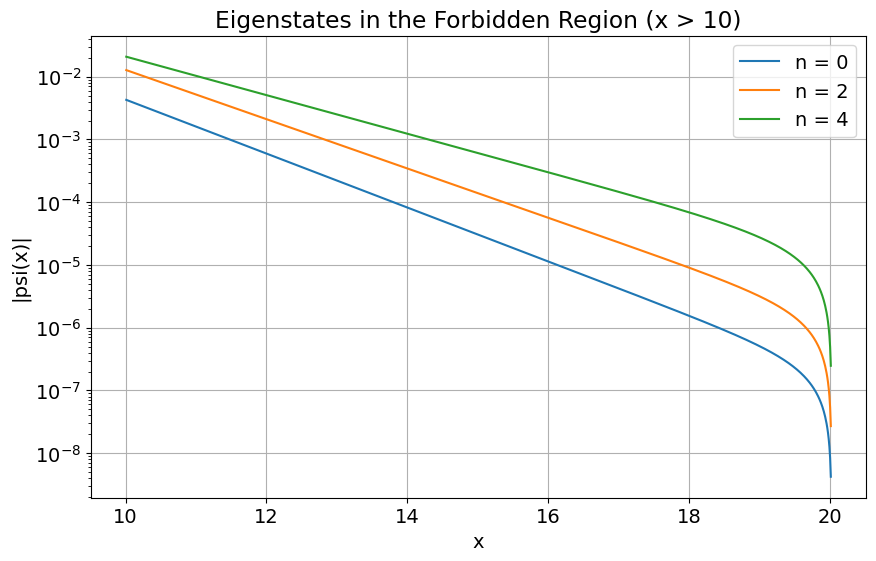

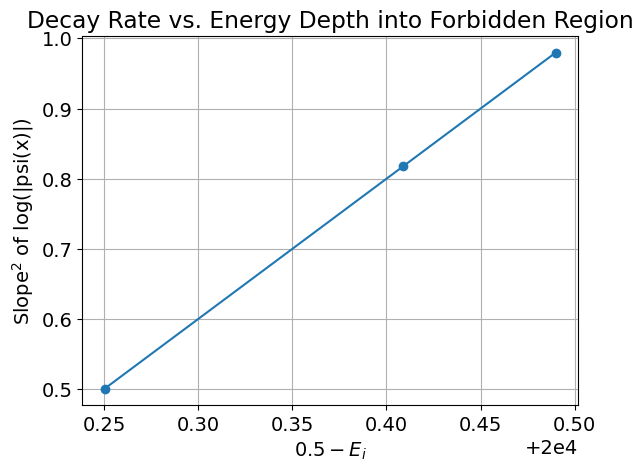

In [27]:
#Defining the forbidden region:
forbidden_mask = xs > 10

#Making a plot of the eigenvectors in the forbidden regionL:
plt.figure(figsize=(10, 6))
for i in [0, 2, 4]:
    plt.plot(xs[forbidden_mask], np.abs(eigvecs[:, i][forbidden_mask]), label=f'n = {i}')

#Showing the plot:
plt.xlabel('x')
plt.ylabel('|psi(x)|')
plt.title('Eigenstates in the Forbidden Region (x > 10)')
plt.legend()
plt.grid(True)
#Should look linear in the log scale to reveal exponetial decay:
plt.yscale('log')
plt.show()

#Avoiding divergence at large x which is due to being further into the forbidden region:
fit_mask = np.logical_and(xs > 10, xs < 16)

#Going deeper into the well:
slopes = []
energy_diffs = []

for i in [0, 2, 4]:
    x_vals = xs[fit_mask]
    y_vals = np.log(np.abs(eigvecs[:, i][fit_mask]))
    slope = np.polyfit(x_vals, y_vals, 1)[0]
    slopes.append(slope)
    energy_diffs.append(0.5 - eigvals[i])

#Showing plot:
plt.plot(energy_diffs, np.array(slopes)**2, 'o-')
plt.xlabel(r'$0.5 - E_i$')
plt.ylabel(r'Slope$^2$ of log(|psi(x)|)')
plt.title('Decay Rate vs. Energy Depth into Forbidden Region')
plt.grid(True)
plt.show()


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Dynamics

Like we did in the particle in the box, we are going to do some dynamics.

Because we are going to do some non-trivial time evolution in this assignment, it's worth enapsulating your time-evolution into two functions:

* `TimeEvolutionOperator(H,delta_t)` should take the Hamiltonian and your time step and return $e^{-iHt}$.   It's important to note that for each Hamiltonian, you only need to compute this time-evolution operator once even if you are time-evolving many different wave-functions. If you are careful about this, you will save yourself significant gime.

* `TimeEvolution(psi,M,steps)` which takes the initial wave-function `psi`, the time-evolution operator `M` and the number of steps and returns a list of arrays that include the snapshot of the wave-function at every time step.

We also want to do an update of the update function so that the animation is slightly more informative. In particular, we are going to want to plot some information about the potential and energy of our state.  Because our y-axis is currently probability (which is at most 1), we will need to rescale the energy (which can get large) so that everything sanely fits on the same axis. To do this, we are going to rescale all our energies by `scale=max_value/energy` where `max_value` is the largest probability your wave-function gets (which we've already been calculating for animation) and `energy` is the energy of our initial wave-function, which you can compute (recall the energy doesn't change as a function of time).

**Modifications of the Update Function**
*  Add a line to compute the energy as well as the relevant scale

*  Plot the Harmonic Oscillator potential on your animation as `plt.plot(xs,potential*scale)`

*  Draw a red-dashed line at the energy of our state - i.e. `plt.axhline(energy*scale)`

* Increaese the `ylim` to 1.5 of max_value


We will start with the wave-function (same superposition of eigenstates as our particle-in-the-box but somewhat different eigenstates so a somewhat different wave-function)

$$|\Psi\rangle = \sqrt{0.1}|v_0\rangle + \sqrt{0.25}|v_1\rangle + i \sqrt{0.65}|v_2\rangle $$

Go ahead and animate this wave-function as a function of time again for a time-step $\delta t=0.5$ and out to time $T=200$.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
#Sets duration and resolution of the simulation:

delta_t = 0.5 #Step interval

T = 200 #Total simulation time

steps = int(T / delta_t) #How big each step of the simulation is

times = np.arange(0, T + delta_t, delta_t) #Array of time points from 0 to T

#Defining 10 wavefunction:
psi0 = (
    np.sqrt(0.1) * eigvecs[:, 0] +
    np.sqrt(0.25) * eigvecs[:, 1] +
    1j * np.sqrt(0.65) * eigvecs[:, 2]
)
#Normalizing 10 wavefunctions:
psi0 /= np.linalg.norm(psi0)

#Project inital state onto eigenbasis:
c = np.conj(eigvecs.T) @ psi0

#Time evolution for each step:
arrays = []
for t in times:
    phase_factors = np.exp(-1j * eigvals * t / hbar)
    psi_t = eigvecs @ (c * phase_factors)
    arrays.append(psi_t)

#shape (len(times), len(xs)):
arrays = np.array(arrays)

#Max |Psi|^2:
max_value = np.max(np.abs(arrays)**2)

#Energy expectation value:
energy = np.vdot(psi0, H @ psi0).real
scale = max_value / energy


#Plot:
fig, ax = plt.subplots(figsize=(8, 4))

#Animation update function:
def update(frame):
    ax.clear()
    psi = arrays[frame]
    prob = np.abs(psi)**2

    ax.plot(xs, prob, label='|psi|²')
    x_expect = np.real(psi.conj() @ X @ psi)  # <x>
    ax.axvline(x_expect, color='gray', linestyle='--', label='<x>')

    ax.plot(xs, V * scale, 'k--', label='Potential')
    ax.axhline(energy * scale, color='red', linestyle='--', label='Energy')

    ax.set_ylim(0, 1.5 * max_value)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability')
    ax.set_title(f'Time evolution at t = {frame*delta_t:.2f}')
    ax.legend()

#Run animation:
ani = FuncAnimation(fig, update, frames=len(arrays), interval=100)
HTML(ani.to_jshtml())


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

If you go back and look at your animation from the particle-in-a-box, it actually should look very similar.  The main different here is that the particle has leaked out slightly of the hard box (-10 to 10) and so you see some weight out there.

Let's also go ahead and plot some observables.  Like you did in the particle-in-a-box go ahead and plot

* the momentum and position as a function of time (on the same subplot)
* the phase plot of momentum vs position
* the energy as a function of time (making sure your scale is sane)



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### answer here

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Again notice the marked similarity to a particle in a box with infinite walls.

### d.  Dynamics above the potential barrier

In this problem, let us consider a superposition of eigenstates that is above the potential barrier. For example, let's take the superposition of eigenstates 9 and 10 (both above the potential) as

$$\Psi= \sqrt{0.35}|e_9\rangle + i \sqrt{0.65}|e_{10}\rangle$$

Produce the same set of animations and observable plots for this wave-function.  

Notice in this case that significant chunks of the wave-function are in the forbidden region.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### answer here

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exerices 2. Eigenstates of Finite Barriers

### a. Diagonalize

Now we will consider a potential with a finite barrier.  Set the potential to be zero except for the range $-1<x<1$ where we will have the potential be $V_0$.  We will start with $V_0=5$

Start by plotting the potential.

Then plot the lowest two eigenvalues and eigenvectors.   What you will find is that these two eigenvectors are nearly degenerate - they have almost the same energy.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### answer here

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. Effects of barrier height and width on eigenstates

We would like to understand how the barrier height and width effects the 0'th eigenstate. Given that we know that there is an exponential decay of the eigenstate in the forbidden region, one interesting thing to look at is the minimum value of the eigenstate around zero.  One way to look at this is to do `np.min(np.abs(v[:,0][mask]))` where `mask=np.logical_and(xs>-10,xs<10)` is centered away from 20 and -20 where it gets tiny simply because of the hard walls there.   

Produce a series of potentials with width 2 centered around zero but height which scales from 0 to 4 (do jumps of 0.1 between 0 and 2 and jumps of 0.4 between 2 and 4 to avoid things being too slow).

Then plot this minimum value as a function of the height.

Do a similar calculation where you let the height be fixed to $V_0=1$ and let the width change from 0 to 4 (with similar jumps).

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### answer here

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 3. Faster Dynamics and Finite Barriers

So far we've done dynamics by evaluating $\exp[-i \Delta t H]$ for a finite $\Delta t$. This has the advantage of being the exact dynamics but when $L$ is large or $\Delta x$ is small this gets very expensive to calculate limiting our ability to do interesting calculations.

Here we are going to introduce an alternative approach.   Consider the time-evolution operator

$$\exp\left[-i\Delta t\left(-\frac{\hat{P}^2}{2m} + \hat{V} \right) \right]^{T/\Delta t}  |\Psi\rangle$$

When $\Delta t \rightarrow 0$, we can write this as

$$\left(\exp\left[-i\Delta t\left(-\frac{\hat{P}^2}{2m}\right)\right] \exp\left[-i \Delta t \hat{V} \right]\right)^{T/\Delta t}  |\Psi\rangle$$

Instead of thinking of time-evolution as applying the exponential of the Hamiltonian, we can think of time evolution as alternatively applying the exponential of the potential and kinetic terms.

If our wave-function is a vector in the position basis (which it mainly has been), then applying the potential term is very easy because multiplying by a diagonal matrix is the same as pointwise multiplying by a vector - i.e.  all three of these lines below are equivalent:
```
scipy.linalg.expm(-1.j*dt*np.diag(V)) @ psi
np.diag(np.exp(-1.j*dt*V)) @ psi
np.exp(-1.j*dt*V) * psi
```
The first line is the sort of thing we've been doing all along (but just with the potential piece).
The last line doesn't involve a matrix at all but just a vector.  Let us define `M_half_x=np.exp(-1.j*dt/2*np.diag(V))`

Unfortunately, the potential piece is complicated if our wave-function is in the position basis. But.... if our wave-function is in the momentum basis, then it would be easy because in the momentum basis that matrix is diagonal so we can just pointwise multiply by the vector `M_p=np.exp(-1.j* dt* -(ks**2)/(2*m))`.

But it's easy to move the wave-function back and forth between the position and momentum basis via an FFT so we can always be in the "good" basis when we have to apply the operator.

This leaves us with the following algorithm to apply a single time-step $\Delta t$ starting with a wave-function `psi` in the position basis:
* (1) apply  M_half_x to psi
* (2) apply  M_half_x to psi
* (3) switch to the momentum basis `psi_k=np.fft.fft(psi)`
* (4) apply M_p to psi_k
* (5) switch to the real space basis `psi=np.fft.ifft(psi_k)`

We then need to do this over and over again for many time-steps  (for technical reasons, it's actually more accurate to put (1) after (5)).

You are making a tiny error in $\Delta t$ but this algorithm is much better then our previous approaches.  You never need to build a big matrix diagonalize a Hamiltonian, etc.  To implement this you will need the k-vectors `ks=np.fft.fftfreq(len(xs), delta_x)*(2*np.pi)`

There is one additional wart.  This will only work on wave-functions that go to zero at the edge of your box but since you can use such a large box this shouldn't be a problem.


### a. Setting up your new time-evolution and a test

Set up code to use this new algorithm.

Start by doing a test for the particle in a finite well with the initial state

$$|\Psi\rangle = \sqrt{0.1}|v_0\rangle + \sqrt{0.25}|v_1\rangle + i \sqrt{0.65}|v_2\rangle $$

in a potential well where $V(x)=0.5$ when $|x|>10$ and $V(x)=0$ otherwise. (to get $\Psi$, you will need to work with your Hamiltonian again which is slow - this is just for a test)

Use
* $\Delta x=0.1$
* $L=40$
* $\Delta t=0.01$.  
* Go to $T=400$ taking a snapshot to graph every $T=1$.

Your animation wants to know what the energy of your wave-function is to rescale the potential.  You don't have to get this working to test your animation but you should fix it after that looks good.

Previously we got this by computing the expectation value with respect to the Hamiltonian.  That is no longer efficient.  Here, we are going to go back to computing expectation values as we did originally for position.

To compute the average potential energy you have

$$\sum_x |\Psi(x)|^2 V(x)$$

and to compute the average kinetic energy you have

$$\sum_k |\Psi(k)|^2 k^2/2m$$

remembering that for this latter quantity you need to switch to k-space.   The total energy is just the same of the kinetic and potential energy.


Compare your result against what the time-evolution for the same system you did earlier in the assignment.



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### answer here

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. Time evolution of a "stationary" gaussian

We should now be ready to choose any potential and any initial state to do time-evolution over.  Let's begin with no potential $V=0$ and the guassian

$$\frac{1}{N} \exp[-\frac{1}{2} x^2]$$

where $N$ is the normalization constant on a grid of $L=200$, $\Delta x=0.1$ and $\Delta t=0.01$ taking a snapshot every 10 time-steps out to a total time of T=1.  You should find that a stationary gaussian simply spreads out as a function of time.  

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### answer here

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Hitting a potential barrier.

Let us now consider a potential barrier with

$$V(x) = V_0 \textrm{ for }  -a<x<a $$

and 0 otherwise.  
Let us start with
* $V_0=10$
* $a=0.5$.  

Taking as an initial wave-function

$$\frac{1}{N} \exp[-0.5 (x+20)^2 + 5i x]$$

where $N$ is the normalization, do time-evolution to $T=10$ with a snapshot every $t=0.1$

Plot also (as a function of t), the amount of probability to the left and right of $x=0$.  



While not required, it's fun to play with barrier height and width and see what happens. Another interesting thing is to .

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### answer here

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>